<a href="https://colab.research.google.com/github/azizamirsaidova/graphanalytics/blob/main/notebooks/true_news_named_entity_recognition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/azizamirsaidova/fake-news-detection.git

Cloning into 'fake-news-detection'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 80 (delta 24), reused 16 (delta 4), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
import nltk.data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### **When data in csv format**

In [ ]:
df = pd.read_csv('/content/true_results.csv')
line = list(df['text'])
#line = line.replace("'generated_text':", '')
replaced_list = list(map(lambda x: x.replace("'generated_text':",''), line))
tokenized_sent = sent_tokenize(''.join(replaced_list))
char_removed_sent = [re.sub('[^a-zA-Z0-9]+$','',item) for item in tokenized_sent]
char_removed_sent_str = ''.join(char_removed_sent)
nlp_sent = nlp(str(char_removed_sent))
spacy_entity_level = [(X.text, X.label_) for X in (nlp_sent).ents]
token_level_entity_anotation = [(X, X.ent_iob_, X.ent_type_) for X in (nlp_sent)]

labels = [x.label_ for x in nlp_sent.ents]
# print(Counter(labels))

items = [x.text for x in nlp_sent.ents]
#Counter(items).most_common(10)

sentences = [x for x in nlp_sent.sents]

In [ ]:
len(nlp_sent.ents)

12553

In [ ]:
d = Counter(labels)
dt = pd.DataFrame.from_dict(d, orient='index').reset_index()
dt = dt.rename(columns={'index':'labels', 0:'count'})
dt

labels  count
0   WORK_OF_ART    181
1          DATE   1801
2      CARDINAL   1342
3        PERSON   1665
4          NORP   1023
5           GPE   1904
6           ORG   2628
7       PRODUCT    112
8          TIME     65
9           LOC    170
10      PERCENT    464
11        MONEY    629
12        EVENT     40
13      ORDINAL    317
14          LAW     87
15          FAC     59
16     QUANTITY     46
17     LANGUAGE     20

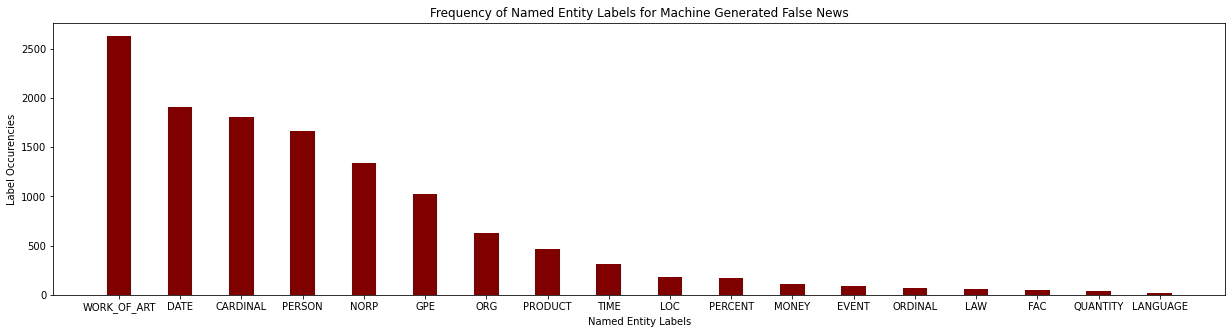

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (21, 5))
plt.bar(dt['labels'], dt['count'].sort_values(ascending=False), color ='maroon',
        width = 0.4)
plt.xlabel("Named Entity Labels")
plt.ylabel("Label Occurencies")
plt.title("Frequency of Named Entity Labels for Machine Generated False News")
# Add annotation to bars
# for i in plt.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5,
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
 
plt.show()


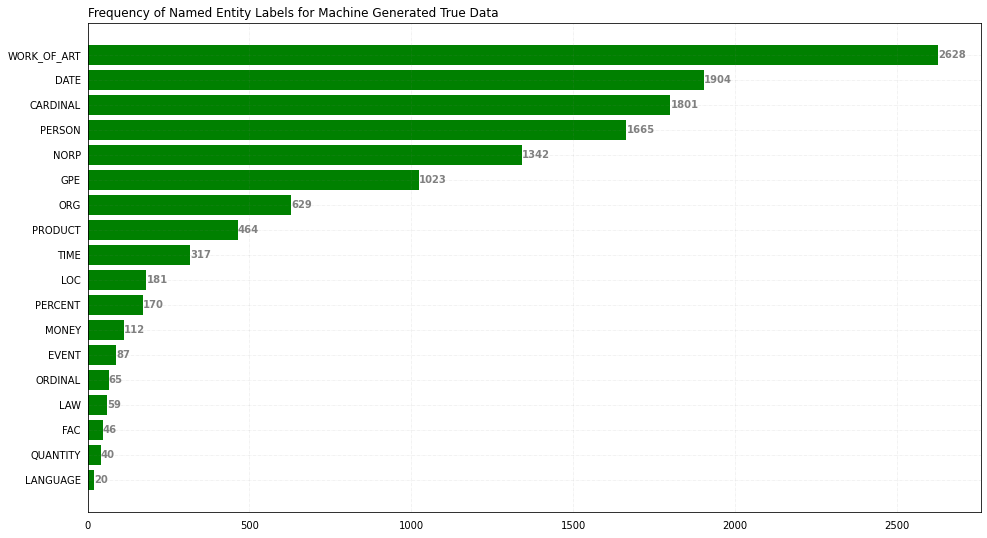

In [ ]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (21, 5))
# plt.bar(dt['labels'], dt['count'], color ='maroon',
#         width = 0.4)
# plt.xlabel("Named Entity Labels")
# plt.ylabel("Label Occurencies")
# plt.title("Frequency of Named Entity Labels for Machine Generated False News")
# plt.show()

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

label = dt['labels']
count = dt['count'].sort_values(ascending=False)
# Horizontal Bar Plot
ax.barh(label, count, color = 'green')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)

# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Frequency of Named Entity Labels for Machine Generated True Data',
             loc ='left', )

# Add Text watermark
# fig.text(0.9, 0.15, , fontsize = 12,
#          color ='grey', ha ='right', va ='bottom',
#          alpha = 0.7)
 
# Show Plot
plt.show()

In [ ]:
displacy.render(nlp(str(sentences)))

### **When data in txt format:**

In [ ]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

lines = []
with open('/content/fake-news-detection/false_results.txt') as f:
    lines = f.readlines()
    for line in lines:
      line = line.replace("'generated_text':", '')
      sents = '\n-----\n'.join(tokenizer.tokenize(line))
      char_removed_sents = re.sub('[^a-zA-Z.\d\s]', '', line)
      spacy_entity_level = [(X.text, X.label_) for X in (nlp(char_removed_sents)).ents]
      token_level_entity_anotation = [(X, X.ent_iob_, X.ent_type_) for X in (nlp(char_removed_sents))]
      sentences = [x for x in nlp(char_removed_sents).sents]
      displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
